In [10]:
import pandas as pd

orders = pd.read_csv("../data/pandas-ext-1.csv")

orders.head()

,OrderID,Date,Customer,Product,Quantity,Price,City
0,1,2023-01-15,John Doe,Laptop,1,1200,New York
1,2,2023-01-16,Jane Smith,Smartphone,2,800,San Francisco
2,3,2023-01-17,Emily Davis,Laptop,1,1300,Los Angeles
3,4,2023-01-18,Chris Brown,Tablet,3,600,New York
4,5,2023-01-19,John Doe,Smartphone,1,800,New York


In [12]:
#Sprawdź typy danych, liczbę wierszy i kolumn oraz czy są wartości brakujące.
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OrderID   10 non-null     int64 
 1   Date      10 non-null     object
 2   Customer  10 non-null     object
 3   Product   10 non-null     object
 4   Quantity  10 non-null     int64 
 5   Price     10 non-null     int64 
 6   City      10 non-null     object
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


,OrderID,Quantity,Price
count,10.00000,10.000000,10.000000
mean,5.50000,1.700000,735.000000
std,3.02765,0.823273,378.630573
min,1.00000,1.000000,200.000000
25%,3.25000,1.000000,525.000000
50%,5.50000,1.500000,700.000000
75%,7.75000,2.000000,1025.000000
max,10.00000,3.000000,1300.000000


In [13]:
#Oblicz całkowitą wartość każdego zamówienia jako iloczyn ilości (Quantity) i ceny (Price).
orders['OrderValue'] = orders['Quantity'] * orders['Price']
orders[['OrderID', 'OrderValue']]

,OrderID,OrderValue
0,1,1200
1,2,1600
2,3,1300
3,4,1800
4,5,800
5,6,400
6,7,600
7,8,2200
8,9,250
9,10,1500


In [14]:
#Oblicz łączną wartość zamówień dla każdego klienta.
high_value_orders = orders[orders['OrderValue'] > 1000]
high_value_orders

,OrderID,Date,Customer,Product,Quantity,Price,City,OrderValue
0,1,2023-01-15,John Doe,Laptop,1,1200,New York,1200
1,2,2023-01-16,Jane Smith,Smartphone,2,800,San Francisco,1600
2,3,2023-01-17,Emily Davis,Laptop,1,1300,Los Angeles,1300
3,4,2023-01-18,Chris Brown,Tablet,3,600,New York,1800
7,8,2023-01-22,Chris Brown,Laptop,2,1100,New York,2200
9,10,2023-01-24,Jane Smith,Tablet,3,500,San Francisco,1500


In [16]:
#Znajdź produkt, który sprzedano w największej liczbie sztuk.
high_value_orders = orders[orders['OrderValue'] > 1000]
high_value_orders

,OrderID,Date,Customer,Product,Quantity,Price,City,OrderValue
0,1,2023-01-15,John Doe,Laptop,1,1200,New York,1200
1,2,2023-01-16,Jane Smith,Smartphone,2,800,San Francisco,1600
2,3,2023-01-17,Emily Davis,Laptop,1,1300,Los Angeles,1300
3,4,2023-01-18,Chris Brown,Tablet,3,600,New York,1800
7,8,2023-01-22,Chris Brown,Laptop,2,1100,New York,2200
9,10,2023-01-24,Jane Smith,Tablet,3,500,San Francisco,1500


In [17]:
#Oblicz łączną sprzedaż (wartość zamówień) w każdym mieście.
total_by_customer = orders.groupby('Customer')['OrderValue'].sum()
total_by_customer

Customer
Chris Brown    4000
Emily Davis    1900
Jane Smith     3500
John Doe       2250
Name: OrderValue, dtype: int64

In [18]:
#Wyświetl wszystkie zamówienia na laptopy.
laptop_orders = orders[orders['Product'] == 'Laptop']
laptop_orders

,OrderID,Date,Customer,Product,Quantity,Price,City,OrderValue
0,1,2023-01-15,John Doe,Laptop,1,1200,New York,1200
2,3,2023-01-17,Emily Davis,Laptop,1,1300,Los Angeles,1300
7,8,2023-01-22,Chris Brown,Laptop,2,1100,New York,2200


In [20]:
#Znajdź dzień, w którym odnotowano największą wartość sprzedaży.
daily_sales = orders.groupby('Date')['OrderValue'].sum()
best_day = daily_sales.idxmax()
print(f"Najlepszy dzień sprzedaży: {best_day}")

Najlepszy dzień sprzedaży: 2023-01-22


In [21]:
#Średnia wartość zamówienia na klienta
avg_order_value = orders.groupby('Customer')['OrderValue'].mean()
avg_order_value

Customer
Chris Brown    2000.000000
Emily Davis     950.000000
Jane Smith     1166.666667
John Doe        750.000000
Name: OrderValue, dtype: float64

In [9]:
#Wykres sprzedaży w czasie: Skorzystaj z Matplotlib do wizualizacji

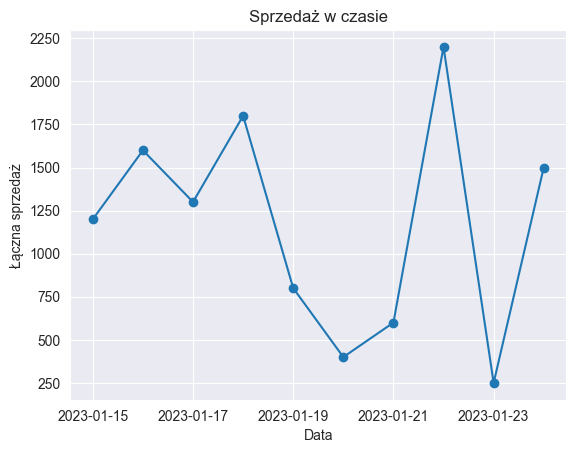

In [22]:
import matplotlib.pyplot as plt

daily_sales.plot(kind='line', marker='o', title='Sprzedaż w czasie')
plt.xlabel('Data')
plt.ylabel('Łączna sprzedaż')
plt.show()